### Problem Statement:
Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.

You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database. You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.

### Data Dictionary:

‘Unnamed 0’- Index of the dataset<br>
Email_hash- Anonymised Personal Identifiable Information (PII)<br>
Company_hash- Current employer of the learner<br>
orgyear- Employment start date<br>
CTC- Current CTC<br>
Job_position- Job profile in the company<br>
CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)

In [119]:
### Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,roc_auc_score, roc_curve, auc)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from imblearn.over_sampling import SMOTE

In [120]:
#loading the dataset

df = pd.read_csv(r"D:\Scaler Case study\Business Case Scaler - Clustering\scaler_clustering.csv")

In [121]:
df.head()

,Unnamed: 0,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
0,0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,2016.0,1100000,Other,2020.0
1,1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,2018.0,449999,FullStack Engineer,2019.0
2,2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,2015.0,2000000,Backend Engineer,2020.0
3,3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,2017.0,700000,Backend Engineer,2019.0
4,4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,2017.0,1400000,FullStack Engineer,2019.0


### Analyzing basic metrics

In [122]:
df.shape #The dataset has 205843 rows and 7 columns

(205843, 7)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205843 entries, 0 to 205842
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        205843 non-null  int64  
 1   company_hash      205799 non-null  object 
 2   email_hash        205843 non-null  object 
 3   orgyear           205757 non-null  float64
 4   ctc               205843 non-null  int64  
 5   job_position      153281 non-null  object 
 6   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 11.0+ MB


In [124]:
#Checking data types of each column

df.dtypes

Unnamed: 0            int64
company_hash         object
email_hash           object
orgyear             float64
ctc                   int64
job_position         object
ctc_updated_year    float64
dtype: object

In [125]:
#Dropping the "Unnamed" column so that our model does not build some understanding based on row numbers leading to wrong o/p.

df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [126]:
df.nunique() #Checking unique values in each column

company_hash         37299
email_hash          153443
orgyear                 77
ctc                   3360
job_position          1017
ctc_updated_year         7
dtype: int64

In [127]:
#Checking missing values

(df.isna().sum()/len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [128]:
#Checking Stastical summary of the data

df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [129]:
## Checking unique value and value counts of the columns

def dist_check(df, col_name):
  print("Unique values =", df[col_name].unique())
  print("Value counts :")
  print(df[col_name].value_counts())

In [130]:
column_list = ['orgyear','ctc','ctc_updated_year']
for col in column_list: 
  print(col, "-")
  dist_check(df, col)
  print("\n")

orgyear -
Unique values = [2.0160e+03 2.0180e+03 2.0150e+03 2.0170e+03 2.0190e+03 2.0200e+03
 2.0120e+03 2.0130e+03 2.0030e+03 2.0060e+03 2.0140e+03 2.0110e+03
 2.0210e+03 2.0080e+03 2.0040e+03 2.0220e+03 2.0090e+03 2.0050e+03
 2.0100e+03 2.0070e+03 2.0000e+03 2.0020e+03 2.0230e+03 2.0010e+03
 1.9810e+03 2.0310e+03        nan 2.0240e+03 1.9960e+03 1.9990e+03
 2.1060e+03 1.9970e+03 1.9940e+03 1.9950e+03 1.9920e+03 1.9730e+03
 1.9910e+03 1.9980e+03 1.9900e+03 1.9930e+03 1.9880e+03 2.0250e+03
 2.0290e+03 0.0000e+00 2.0800e+02 1.9850e+03 2.0900e+02 2.0600e+02
 1.9820e+03 2.0260e+03 1.9700e+03 2.1010e+03 1.9720e+03 2.1070e+03
 1.9860e+03 1.9890e+03 9.1000e+01 1.9870e+03 3.0000e+00 2.0270e+03
 2.0000e+00 1.9760e+03 4.0000e+00 5.0000e+00 1.9710e+03 1.9770e+03
 1.9840e+03 8.3000e+01 1.0000e+00 1.9790e+03 2.0280e+03 2.2040e+03
 3.8000e+01 1.9000e+03 2.0100e+02 6.0000e+00 2.0165e+04 2.0000e+02]
Value counts :
2018.0    25256
2019.0    23427
2017.0    23239
2016.0    23043
2015.0    20610
       

### Regex for cleaning company names

In [131]:
df['company_hash'] = df['company_hash'].str.replace('[^A-Za-z\s]+', '')

In [132]:
df['company_hash'].head()

0               atrgxnnt xzaxv
1    qtrxvzwt xzegwgbb rxbxnta
2                ojzwnvwnxw vx
3                    ngpgutaxv
4                   qxen sqghu
Name: company_hash, dtype: object

### Dropping duplicate records

In [133]:
df = df.drop_duplicates(['email_hash','company_hash'])

In [134]:
df.shape

(160311, 6)

In [135]:
df.nunique()

company_hash         37225
email_hash          153443
orgyear                 77
ctc                   3278
job_position           751
ctc_updated_year         7
dtype: int64

In [136]:
duplicate_values = df['company_hash'].duplicated().value_counts()
print(duplicate_values)

True     123085
False     37226
Name: company_hash, dtype: int64


In [137]:
duplicate_values1 = df['email_hash'].duplicated().value_counts()
print(duplicate_values1)

False    153443
True       6868
Name: email_hash, dtype: int64


### Handling missing values and performing KNN Imputation on numerical features and mode imputation for categorical columns

In [138]:
df_numerical = df.select_dtypes(np.number) #Extracting columns with numerical data type
df_numerical

,orgyear,ctc,ctc_updated_year
0,2016.0,1100000,2020.0
1,2018.0,449999,2019.0
2,2015.0,2000000,2020.0
3,2017.0,700000,2019.0
4,2017.0,1400000,2019.0
...,...,...,...
205838,2008.0,220000,2019.0
205839,2017.0,500000,2020.0
205840,2021.0,700000,2021.0
205841,2019.0,5100000,2019.0


In [139]:
#Performing KNN Imputation

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5, metric='nan_euclidean', weights='uniform')
imputer.fit(df_numerical)
df_numerical_new = imputer.transform(df_numerical)

In [140]:
df_numerical_new=pd.DataFrame(df_numerical_new) #Converting to dataframe
df_numerical_new

,0,1,2
0,2016.0,1100000.0,2020.0
1,2018.0,449999.0,2019.0
2,2015.0,2000000.0,2020.0
3,2017.0,700000.0,2019.0
4,2017.0,1400000.0,2019.0
...,...,...,...
160306,2008.0,220000.0,2019.0
160307,2017.0,500000.0,2020.0
160308,2021.0,700000.0,2021.0
160309,2019.0,5100000.0,2019.0


In [141]:
columns=df_numerical.columns

In [142]:
df_numerical_new.columns=columns

In [143]:
df_numerical_new.isna().sum()

orgyear             0
ctc                 0
ctc_updated_year    0
dtype: int64

In [144]:
df_cat = df.select_dtypes(object) #Extracting columns with non-numerical data type
df_cat

,company_hash,email_hash,job_position
0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other
1,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer
2,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer
3,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer
4,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer
...,...,...,...
205838,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,NaN
205839,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,NaN
205840,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,NaN
205841,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,NaN


In [145]:
#Using mode imputation

df_cat = df_cat.fillna(df.mode().iloc[0])

In [146]:
df_cat.isna().sum()

company_hash    0
email_hash      0
job_position    0
dtype: int64

In [147]:
df_numerical_new = df_numerical_new.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)

In [148]:
#Merging both the data frames, numerical and non-numerical

data = pd.concat([df_numerical_new, df_cat], axis=1)

In [149]:
data.isna().sum() #Now there are no missing values

orgyear             0
ctc                 0
ctc_updated_year    0
company_hash        0
email_hash          0
job_position        0
dtype: int64

In [150]:
data

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position
0,2016.0,1100000.0,2020.0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other
1,2018.0,449999.0,2019.0,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer
2,2015.0,2000000.0,2020.0,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer
3,2017.0,700000.0,2019.0,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer
4,2017.0,1400000.0,2019.0,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer
...,...,...,...,...,...,...
160306,2008.0,220000.0,2019.0,vuurt xzw,70027b728c8ee901fe979533ed94ffda97be08fc23f33b...,Backend Engineer
160307,2017.0,500000.0,2020.0,husqvawgb,7f7292ffad724ebbe9ca860f515245368d714c84705b42...,Backend Engineer
160308,2021.0,700000.0,2021.0,vwwgrxnt,cb25cc7304e9a24facda7f5567c7922ffc48e3d5d6018c...,Backend Engineer
160309,2019.0,5100000.0,2019.0,zgn vuurxwvmrt,fb46a1a2752f5f652ce634f6178d0578ef6995ee59f6c8...,Backend Engineer


### Univariate Analysis/Bivariate Analysis

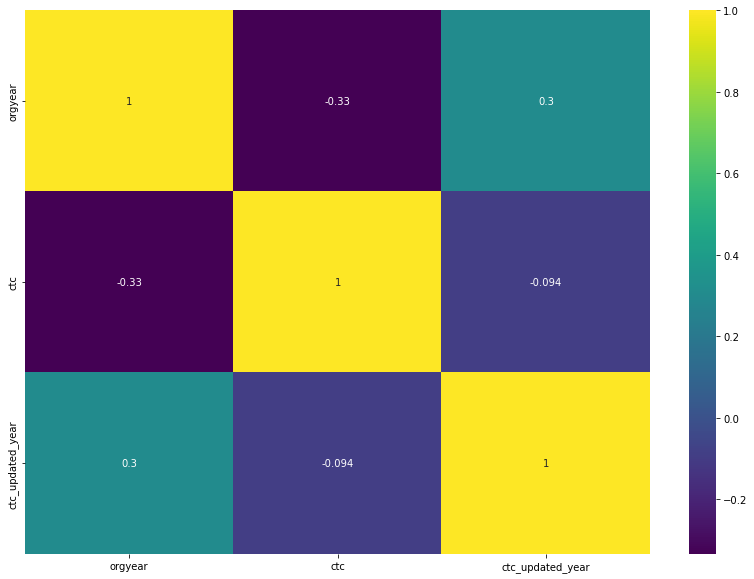

In [151]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

From the above heatmap:
<ul>
<li>orgyear and ctc are negatively correlated</li>
<li>orgyear and ctc_updated_year are positively correlated</li>
<li>ctc and ctc_updated_year are highly negatively correlated</li>
</ul>

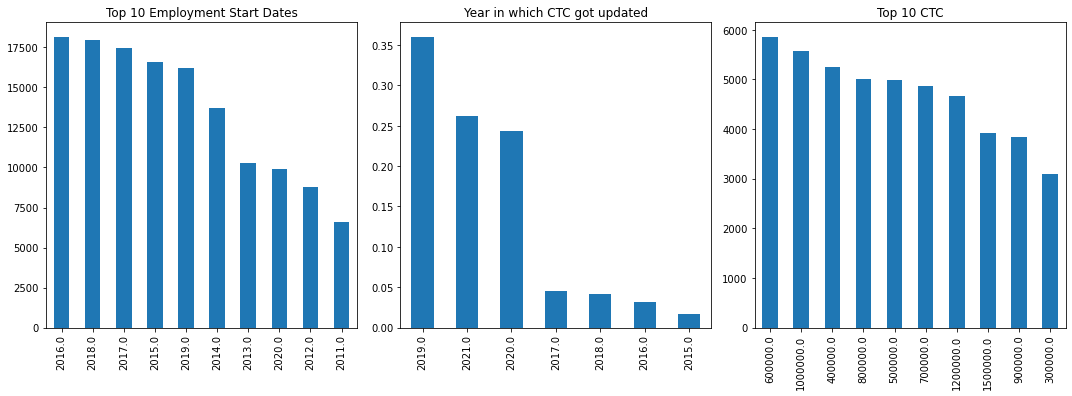

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Plot 1
plt.subplot(231)
top_10_orgyears = data['orgyear'].value_counts().nlargest(10)
top_10_orgyears.plot.bar(title='Top 10 Employment Start Dates')

# Plot 2
plt.subplot(232)
data['ctc_updated_year'].value_counts(normalize=True).plot.bar(title='Year in which CTC got updated')

# Plot 3
plt.subplot(233)
top_10_ctc = data['ctc'].value_counts().nlargest(10)
top_10_ctc.plot.bar(title='Top 10 CTC')

plt.tight_layout() 
plt.show()

#### Checking the top 10 Job positions in the data

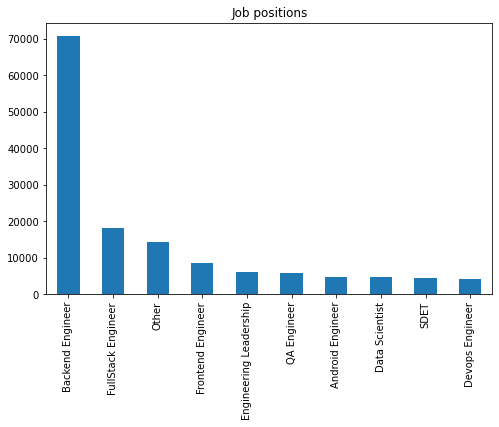

In [153]:
plt.figure(figsize=(8, 5))
top_10_jobPosition = data['job_position'].value_counts().nlargest(10)
top_10_jobPosition.plot.bar(title='Job positions')

From the graphs:
<ul>
<li>2015 to 2018 has the most number of Employee start dates</li>
<li>2019 was the year where the salary increment was the highest</li>
<li>Backend Engineer is the job position which is the most frequent in the data</li>
</ul>

### Outlier detection

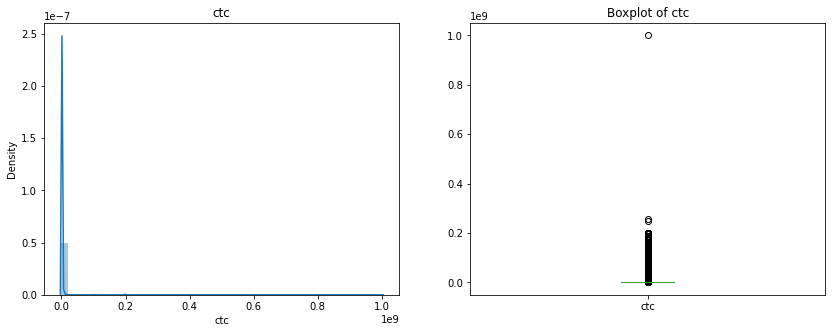

In [154]:
plt.subplots(figsize=(14,5))
plt.subplot(121)
sns.distplot(data['ctc'])
plt.title("ctc")
plt.subplot(122)
data['ctc'].plot.box(title='Boxplot of ctc')

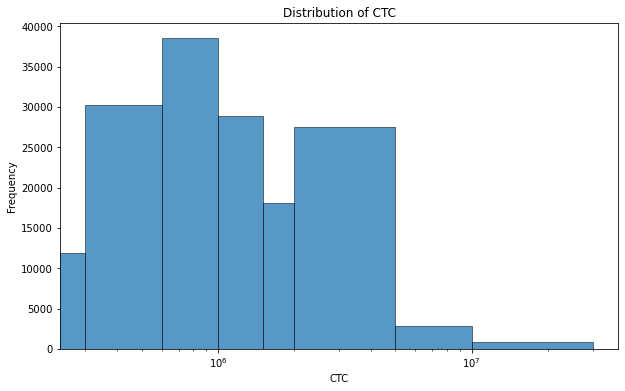

In [155]:
import matplotlib.pyplot as plt


ctc_bins = [0, 300000, 600000, 1000000, 1500000, 2000000, 5000000, 10000000, 30000000]

plt.figure(figsize=(10, 6))
sns.histplot(data['ctc'], bins=ctc_bins, edgecolor='black')
plt.xscale('log')
plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()


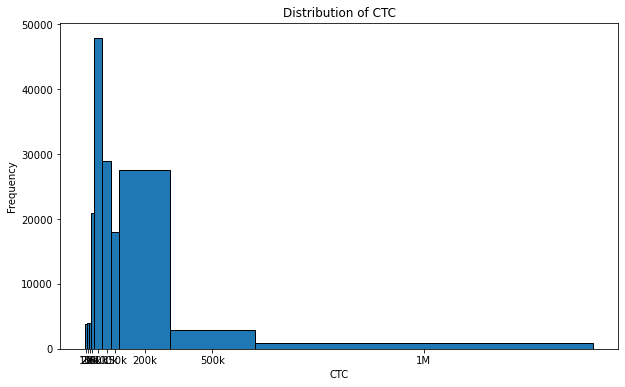

In [156]:
import numpy as np
import matplotlib.pyplot as plt

ctc_bins = [0, 100000, 200000, 300000, 500000, 1000000, 1500000, 2000000, 5000000, 10000000, 30000000]

plt.figure(figsize=(10, 6))
hist, edges, _ = plt.hist(data['ctc'], bins=ctc_bins, edgecolor='black')

tick_positions = edges[:-1] + np.diff(edges) / 2  # Set ticks at bin midpoints
tick_labels = ['2k', '10k', '20k', '30k', '50k', '100k', '150k', '200k', '500k', '1M', '3M']
plt.xticks(tick_positions, tick_labels)

plt.title('Distribution of CTC')
plt.xlabel('CTC')
plt.ylabel('Frequency')
plt.show()

In [157]:
def detect_outliers(data):
    length_before = len(data)
    Q1 = np.percentile(data,25)
    Q3 = np.percentile(data,75)
    IQR = Q3-Q1
    upperbound = Q3+1.5*IQR
    lowerbound = Q1-1.5*IQR
    if lowerbound < 0:
        lowerbound = 0
    
    length_after = len(data[(data>lowerbound)&(data<upperbound)])
    return f"{np.round((length_before-length_after)/length_before,4)} % Outliers data from input data found"

In [158]:
for col in df_numerical_new.columns:
    print(col," : ",detect_outliers(df_numerical_new[col]))

orgyear  :  0.0416 % Outliers data from input data found
ctc  :  0.0675 % Outliers data from input data found
ctc_updated_year  :  0.0485 % Outliers data from input data found


In [159]:
data.describe()

,orgyear,ctc,ctc_updated_year
count,160311.000000,1.603110e+05,160311.000000
mean,2014.626472,2.475029e+06,2019.474740
std,71.475942,1.287982e+07,1.356445
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.500000e+05,2019.000000
50%,2016.000000,9.700000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [160]:
for col in df_numerical_new:
    mean = data[col].mean()
    std = data[col].std()

    upper_limit = mean+3*std
    lower_limit = mean-3*std

    data = data[(df_numerical_new[col]<upper_limit) & (df_numerical_new[col]>lower_limit)]

data.shape

(156189, 6)

In [161]:
df_numerical_new.describe()

,orgyear,ctc,ctc_updated_year
count,160311.000000,1.603110e+05,160311.000000
mean,2014.626472,2.475029e+06,2019.474740
std,71.475942,1.287982e+07,1.356445
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.500000e+05,2019.000000
50%,2016.000000,9.700000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [162]:
data.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position
0,2016.0,1100000.0,2020.0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other
1,2018.0,449999.0,2019.0,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer
2,2015.0,2000000.0,2020.0,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer
3,2017.0,700000.0,2019.0,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer
4,2017.0,1400000.0,2019.0,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer


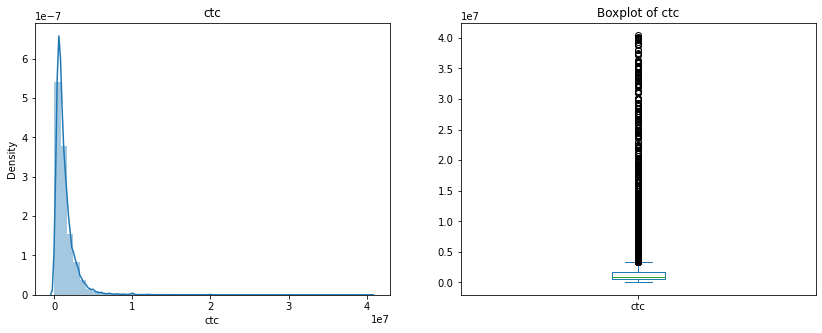

In [163]:
plt.subplots(figsize=(14,5))
plt.subplot(121)
sns.distplot(data['ctc'])
plt.title("ctc")
plt.subplot(122)
data['ctc'].plot.box(title='Boxplot of ctc')

In [164]:
data.shape

(156189, 6)

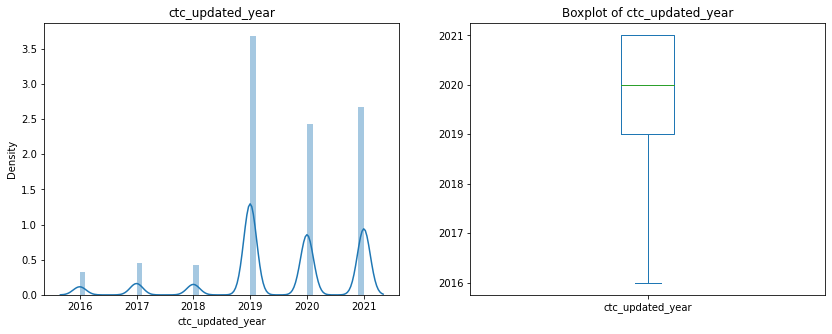

In [165]:
plt.subplots(figsize=(14,5))
plt.subplot(121)
sns.distplot(data['ctc_updated_year'])
plt.title("ctc_updated_year")
plt.subplot(122)
data['ctc_updated_year'].plot.box(title='Boxplot of ctc_updated_year')

### Feature Engineering

In [166]:
#Creating Years_of_Experience column

import datetime
current_year = datetime.datetime.now().year 
current_year 

2023

In [167]:
data['Years_of_Experience'] = current_year - data['orgyear']

In [168]:
data.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,Years_of_Experience
0,2016.0,1100000.0,2020.0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,7.0
1,2018.0,449999.0,2019.0,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,5.0
2,2015.0,2000000.0,2020.0,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,8.0
3,2017.0,700000.0,2019.0,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,6.0
4,2017.0,1400000.0,2019.0,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,6.0


In [169]:
data['Years_of_Experience'].value_counts()

 5.0     17738
 7.0     17331
 6.0     16993
 8.0     16090
 4.0     16089
         ...  
-78.0        1
 11.4        1
 10.8        1
-83.0        1
 12.6        1
Name: Years_of_Experience, Length: 95, dtype: int64

#### We see few rows have values less than 0 which is ideally not possible. Hence we have dropped them.

In [170]:
data = data[data['Years_of_Experience'] >= 0]

In [171]:
data.shape

(156128, 7)

### Creating a column CTC_Category which will bin employees based on their ctc - either low, average or high

In [172]:
def categorize_ctc(ctc):
    if ctc < 800000:
        return 'Low'
    elif 800000 <= ctc < 1500000:
        return 'Average'
    else:
        return 'High'

In [173]:
data['CTC_Category'] = data['ctc'].apply(categorize_ctc)

In [174]:
data.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,Years_of_Experience,CTC_Category
0,2016.0,1100000.0,2020.0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,7.0,Average
1,2018.0,449999.0,2019.0,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,5.0,Low
2,2015.0,2000000.0,2020.0,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,8.0,High
3,2017.0,700000.0,2019.0,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,6.0,Low
4,2017.0,1400000.0,2019.0,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,6.0,Average


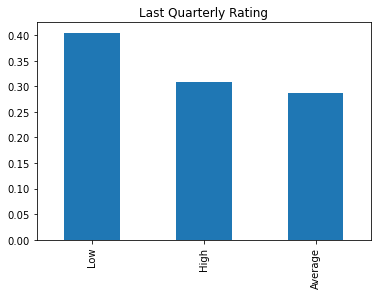

In [175]:
#Plotting the graph for CTC category

data['CTC_Category'].value_counts(normalize=True).plot.bar(title='Last Quarterly Rating')

#We see most of the employees are either categorized under 'Low' or 'High' category

### Manual Clustering

In [240]:
grp = ['company_hash']
data_new = data.groupby(grp).agg({'ctc':[('mean3','mean'),'median','min','max','count']}).reset_index()
data_new.columns  = ["{} {}".format(b_, a_) if a_ not in grp else "{}".format(a_) for a_, b_ in zip(data_new.columns.droplevel(1), data_new.columns.droplevel(0))  ]
data_new.head(100).tail(50)


data_temp = data.merge(data_new[grp + ['mean3 ctc']],on=grp,how='left')

col1 = 'ctc'
col2 = 'mean3 ctc' 
conditions  = [ data_temp[col1] > data_temp[col2], data_temp[col1] == data_temp[col2], data_temp[col1] < data_temp[col2] ]
choices     = [ 1, 2, 3 ]
    
data_temp['Tier'] = np.select(conditions, choices, default=np.nan)

In [179]:
data_temp['tier_diff'] = data_temp['ctc'] - data_temp['mean3 ctc']

In [180]:
data_temp.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff
0,2016.0,1100000.0,2020.0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,7.0,Average,1.115667e+06,3.0,-15666.666667
1,2018.0,449999.0,2019.0,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,5.0,Low,1.290895e+06,3.0,-840896.049275
2,2015.0,2000000.0,2020.0,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,8.0,High,2.000000e+06,2.0,0.000000
3,2017.0,700000.0,2019.0,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,6.0,Low,1.580481e+06,3.0,-880480.769231
4,2017.0,1400000.0,2019.0,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,6.0,Average,8.480000e+05,1.0,552000.000000


In [181]:
data_temp.dtypes

orgyear                float64
ctc                    float64
ctc_updated_year       float64
company_hash            object
email_hash              object
job_position            object
Years_of_Experience    float64
CTC_Category            object
mean3 ctc              float64
Tier                   float64
tier_diff              float64
dtype: object

#### Top 10 employees (earning more than most of the employees in the company) - Tier 1

In [182]:
data_temp[data_temp['Tier'] == 1.0].sort_values('tier_diff',ascending=False).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
23759,c10e681ee046b07a7b93708d92e723dd4eba7cdab0177f...,40150000.0,9.682193e+05
15458,a7d4f2a279c70032c8448d4963cc72cb49145740929135...,40000000.0,8.632420e+05
14048,405acce4415219a5001f40c37ca2e5f07d433a8e769641...,39900000.0,8.233380e+05
14772,c97964bbf7f0f192cd4e4650cbc0fb01366a8f6165e75f...,40000000.0,1.084823e+06
75548,a7b47e958b5a48f375cb74e23537b601396356545a19c5...,40000000.0,1.104836e+06
40072,c240203d659ee5ef1a7ed9d8368ec86b7fc1d21e10701b...,39800000.0,1.109801e+06
108377,a7b47e958b5a48f375cb74e23537b601396356545a19c5...,40000000.0,1.311297e+06
10518,03536d058ef6743a1e2377620f31b8bb9851377b9ba84b...,40000000.0,1.357678e+06
122705,c6409229b18c5c814e6e41c795626c72592b383286194c...,40000000.0,1.421259e+06
128111,55c7eef700e87fcd506c731be6dbbdcb79bf709678c2eb...,39600000.0,1.759410e+06


#### Bottom 10 employees (earning less than most of the employees in the company)- Tier 3

In [183]:
data_temp[data_temp['Tier'] == 3].sort_values('tier_diff',ascending=True).head(10)[['email_hash','ctc','mean3 ctc']]

,email_hash,ctc,mean3 ctc
100368,9ca86eeb00a5d60bb89f69e8229e21e25a12c4f98240b5...,50000.0,2.002500e+07
142625,fbbbddb9828a870c38f5b8f0fc91fcb2158ccb678fbd09...,200000.0,1.473333e+07
21063,f1f2edf4fe0ad0264298b2b95544c549a0d9803f3d4e92...,500000.0,1.400000e+07
4836,046ac7f8b43e489986d07b565a983765374fcd19e27e17...,200000.0,1.210000e+07
100366,80b7cf9e765e92b88bed049154dcb09a187b37248b0194...,450000.0,1.121667e+07
68310,0c9b0d53b1b92b492aa7c7dc96768b54dc04066792c500...,2000000.0,1.233333e+07
121104,bf108a60e196ec00c6dfff7c1d0585df7e79f1e96105b0...,180000.0,1.039333e+07
70471,a57070b10adb654f3354575d6d66f1e3763abd9bb1d1a3...,100000.0,1.005000e+07
69546,bfdcb1bf2720f697dbdb023384ac4fe38e9d14e3bd2f0a...,700000.0,1.061333e+07
92894,2355bdc31a9bec916a281e5f6020bd563c349f29d5469b...,200000.0,1.010000e+07


#### Top 10 companies (based on their CTC)

In [184]:
data_temp.groupby('company_hash').mean()['ctc'].reset_index().sort_values('ctc',ascending=False).head(10)[['company_hash','ctc']]

,company_hash,ctc
33440,xzntqvwnxctmttoucn,40000000.0
4756,cxzxrgp ogrhnxgz ucn rna,40000000.0
1901,bgpoyvq wqtvnxct onhaxgo,40000000.0
26373,vhqtwgz,40000000.0
30982,wvqqteghqtq,40000000.0
1178,avtfgg uvwp,40000000.0
17697,pgnnvzk,40000000.0
1864,bgngktz ehtr ojontb,36360000.0
21426,srgmvr ogenfvqt,36000000.0
35234,zgmrt ogen ntwyzgrgsxto ucn rna,35300000.0


#### Top 2 positions in every company (based on their CTC)

In [185]:
position = data_temp[data_temp['job_position'] != 'na']
position = position.groupby(['company_hash','job_position']).mean().sort_values(['company_hash','ctc']).reset_index()
position = position.groupby('company_hash').head(2)[['company_hash','job_position']]
position

,company_hash,job_position
0,,Engineering Leadership
1,,Android Engineer
10,,Backend Engineer
11,fvj ntwyzgrgsj,Frontend Engineer
12,atsqtt ntwyzgogen,Backend Engineer
...,...,...
58449,zz,Other
58450,zz wgzztwn mya,Other
58451,zzb ztdnstz vacxogqj ucn rna,FullStack Engineer
58452,zzgato,Backend Engineer


### Data Preparation for Modeling

In [188]:
#Label Encoding for CTC_Category feature

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_temp['CTC_Category'] = label_encoder.fit_transform(data_temp['CTC_Category'])

In [189]:
data_temp.head()

,orgyear,ctc,ctc_updated_year,company_hash,email_hash,job_position,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff
0,2016.0,1100000.0,2020.0,atrgxnnt xzaxv,6de0a4417d18ab14334c3f43397fc13b30c35149d70c05...,Other,7.0,0,1.115667e+06,3.0,-15666.666667
1,2018.0,449999.0,2019.0,qtrxvzwt xzegwgbb rxbxnta,b0aaf1ac138b53cb6e039ba2c3d6604a250d02d5145c10...,FullStack Engineer,5.0,2,1.290895e+06,3.0,-840896.049275
2,2015.0,2000000.0,2020.0,ojzwnvwnxw vx,4860c670bcd48fb96c02a4b0ae3608ae6fdd98176112e9...,Backend Engineer,8.0,1,2.000000e+06,2.0,0.000000
3,2017.0,700000.0,2019.0,ngpgutaxv,effdede7a2e7c2af664c8a31d9346385016128d66bbc58...,Backend Engineer,6.0,2,1.580481e+06,3.0,-880480.769231
4,2017.0,1400000.0,2019.0,qxen sqghu,6ff54e709262f55cb999a1c1db8436cb2055d8f79ab520...,FullStack Engineer,6.0,0,8.480000e+05,1.0,552000.000000


In [190]:
## Dropping other cateogrical columns

data_temp = data_temp.drop(['company_hash','email_hash','job_position'],axis=1)

In [191]:
data_temp.head()

,orgyear,ctc,ctc_updated_year,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff
0,2016.0,1100000.0,2020.0,7.0,0,1.115667e+06,3.0,-15666.666667
1,2018.0,449999.0,2019.0,5.0,2,1.290895e+06,3.0,-840896.049275
2,2015.0,2000000.0,2020.0,8.0,1,2.000000e+06,2.0,0.000000
3,2017.0,700000.0,2019.0,6.0,2,1.580481e+06,3.0,-880480.769231
4,2017.0,1400000.0,2019.0,6.0,0,8.480000e+05,1.0,552000.000000


### Standardization of data

In [192]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_temp)

StandardScaler()

In [193]:
data_scaled = scaler.fit_transform(data_temp)

In [194]:
data_scaled=pd.DataFrame(data_scaled,columns=data_temp.columns) #Converting to dataframe

In [195]:
data_scaled.head()

,orgyear,ctc,ctc_updated_year,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff
0,0.254081,-0.160464,0.367231,-0.254081,-1.357661,-0.243003,0.893523,-1.184466e-02
1,0.713827,-0.545192,-0.439543,-0.713827,1.071782,-0.076305,0.893523,-6.357531e-01
2,0.024208,0.372236,0.367231,-0.024208,-0.142940,0.598280,-0.242706,-1.352966e-18
3,0.483954,-0.397219,-0.439543,-0.483954,1.071782,0.199183,0.893523,-6.656808e-01
4,0.483954,0.017103,-0.439543,-0.483954,-1.357661,-0.497640,-1.378935,4.173354e-01


### K-means clustering

In [196]:
from sklearn.cluster import KMeans

In [197]:
model = KMeans(n_clusters=4)
model.fit(data_scaled)

KMeans(n_clusters=4)

In [198]:
data_scaled[:5]

,orgyear,ctc,ctc_updated_year,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff
0,0.254081,-0.160464,0.367231,-0.254081,-1.357661,-0.243003,0.893523,-1.184466e-02
1,0.713827,-0.545192,-0.439543,-0.713827,1.071782,-0.076305,0.893523,-6.357531e-01
2,0.024208,0.372236,0.367231,-0.024208,-0.142940,0.598280,-0.242706,-1.352966e-18
3,0.483954,-0.397219,-0.439543,-0.483954,1.071782,0.199183,0.893523,-6.656808e-01
4,0.483954,0.017103,-0.439543,-0.483954,-1.357661,-0.497640,-1.378935,4.173354e-01


In [199]:
model.labels_

array([3, 0, 3, ..., 0, 3, 3])

In [200]:
#plt.scatter(data_scaled[:, 0], data_scaled[:, 1] , data_scaled[:, 2],data_scaled[:, 3],data_scaled[:, 4],data_scaled[:,5],
            #data_scaled[:, 6],data_scaled[:, 7],c = model.labels_ )

In [201]:
model.inertia_

716545.2525620821

In [202]:
wcss = []
for k in range(1,30):
    model = KMeans(n_clusters=k)
    model.fit(data_scaled)
    wcss.append(model.inertia_)

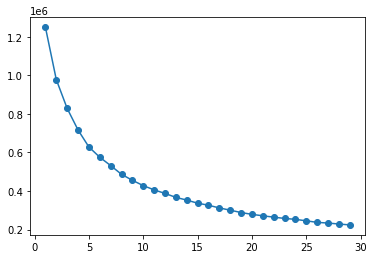

In [203]:
plt.plot(range(1, 30), wcss, marker = 'o')

The optimal number of clusters is around 16-20 using Elbow method

In [204]:
labels = model.labels_
pd.Series(labels).value_counts()

8     18459
20    12097
1     10004
12     9256
0      9230
2      8888
23     8667
25     7538
21     7328
24     7023
5      6452
10     6113
22     5866
14     5522
19     4893
11     4656
3      4576
9      3894
18     3883
6      2913
26     2095
28     2026
16     1867
13     1401
15      723
27      459
4       158
7        80
17       61
dtype: int64

In [205]:
# Creating a column to indicate which cluster it was assigned to

data_scaled['kmeans'] = labels

In [206]:
data_scaled.head()

,orgyear,ctc,ctc_updated_year,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff,kmeans
0,0.254081,-0.160464,0.367231,-0.254081,-1.357661,-0.243003,0.893523,-1.184466e-02,12
1,0.713827,-0.545192,-0.439543,-0.713827,1.071782,-0.076305,0.893523,-6.357531e-01,20
2,0.024208,0.372236,0.367231,-0.024208,-0.142940,0.598280,-0.242706,-1.352966e-18,14
3,0.483954,-0.397219,-0.439543,-0.483954,1.071782,0.199183,0.893523,-6.656808e-01,20
4,0.483954,0.017103,-0.439543,-0.483954,-1.357661,-0.497640,-1.378935,4.173354e-01,2


Most of the employees are falling in cluster 8,20 and 1

### Hierarchical Clustering

In [207]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy as sch

#### We will divide the data since the number of data points is large.

In [233]:
import numpy as np
import pandas as pd
from scipy.cluster import hierarchy as sch

# Assuming data_scaled is your DataFrame
total_rows, total_columns = data_scaled.shape
num_parts = 6

# Divide the DataFrame into multiple parts
split_indices = np.array_split(np.arange(total_rows), num_parts)

# Perform hierarchical clustering on each part separately
Z_parts = []
for indices in split_indices:
    data_part = data_scaled.iloc[indices, :]
    Z_part = sch.linkage(data_part, metric='euclidean', method='ward')
    Z_parts.append(Z_part)

# Combine the results if needed
Z_combined = np.concatenate(Z_parts, axis=0)


In [237]:
Z_combined_new=pd.DataFrame(Z_combined) #Converting to dataframe

In [238]:
Z_combined_new.head()

,0,1,2,3
0,2.0,7239.0,0.0,2.0
1,9.0,342.0,0.0,2.0
2,11.0,1552.0,0.0,2.0
3,12.0,25076.0,0.0,2.0
4,13.0,8971.0,0.0,2.0


In [236]:
Z_combined.shape

(156122, 4)

In [216]:
data_part['job_position'] = data['job_position']

In [217]:
data_part.set_index('job_position',inplace=True)

In [218]:
data_part

,orgyear,ctc,ctc_updated_year,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff,kmeans
job_position,,,,,,,,,
Data Analyst,-2.044648,1.171285,-0.439543,2.044648,-0.142940,0.427896,-1.378935,1.156067,26
Backend Engineer,-0.205665,-0.101275,-0.439543,0.205665,-1.357661,1.169071,0.893523,-1.058459,1
FullStack Engineer,0.943700,-0.338030,-0.439543,-0.943700,-1.357661,-0.568838,-1.378935,0.020294,2
Backend Engineer,0.254081,0.253858,-0.439543,-0.254081,-0.142940,-0.111995,-1.378935,0.413268,21
Backend Engineer,-1.584903,0.105886,-0.439543,1.584903,-0.142940,-0.055356,-1.378935,0.179245,22
...,...,...,...,...,...,...,...,...,...
Backend Engineer,-1.584903,-0.681325,-0.439543,1.584903,1.071782,0.389762,0.893523,-1.180040,28
Backend Engineer,0.483954,-0.515597,0.367231,-0.483954,1.071782,-0.003016,0.893523,-0.656195,8
Backend Engineer,1.403445,-0.397219,1.174005,-1.403445,1.071782,0.060360,0.893523,-0.555354,8


In [225]:
hc = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
lables = hc.fit_predict(data_part)

In [226]:
lables

array([3, 0, 0, ..., 2, 4, 1], dtype=int64)

In [227]:
data_part['labels'] = lables

In [228]:
data_part

,orgyear,ctc,ctc_updated_year,Years_of_Experience,CTC_Category,mean3 ctc,Tier,tier_diff,kmeans,labels
job_position,,,,,,,,,,
Data Analyst,-2.044648,1.171285,-0.439543,2.044648,-0.142940,0.427896,-1.378935,1.156067,26,3
Backend Engineer,-0.205665,-0.101275,-0.439543,0.205665,-1.357661,1.169071,0.893523,-1.058459,1,0
FullStack Engineer,0.943700,-0.338030,-0.439543,-0.943700,-1.357661,-0.568838,-1.378935,0.020294,2,0
Backend Engineer,0.254081,0.253858,-0.439543,-0.254081,-0.142940,-0.111995,-1.378935,0.413268,21,1
Backend Engineer,-1.584903,0.105886,-0.439543,1.584903,-0.142940,-0.055356,-1.378935,0.179245,22,1
...,...,...,...,...,...,...,...,...,...,...
Backend Engineer,-1.584903,-0.681325,-0.439543,1.584903,1.071782,0.389762,0.893523,-1.180040,28,3
Backend Engineer,0.483954,-0.515597,0.367231,-0.483954,1.071782,-0.003016,0.893523,-0.656195,8,2
Backend Engineer,1.403445,-0.397219,1.174005,-1.403445,1.071782,0.060360,0.893523,-0.555354,8,2


In [229]:
data_part['labels'].value_counts()

1    6968
0    6944
2    5324
3    4592
4    2193
Name: labels, dtype: int64

In [230]:
y_pred = hc.fit_predict(data_part)

#### Plotingt a line graph to see the characteristics of the clusters

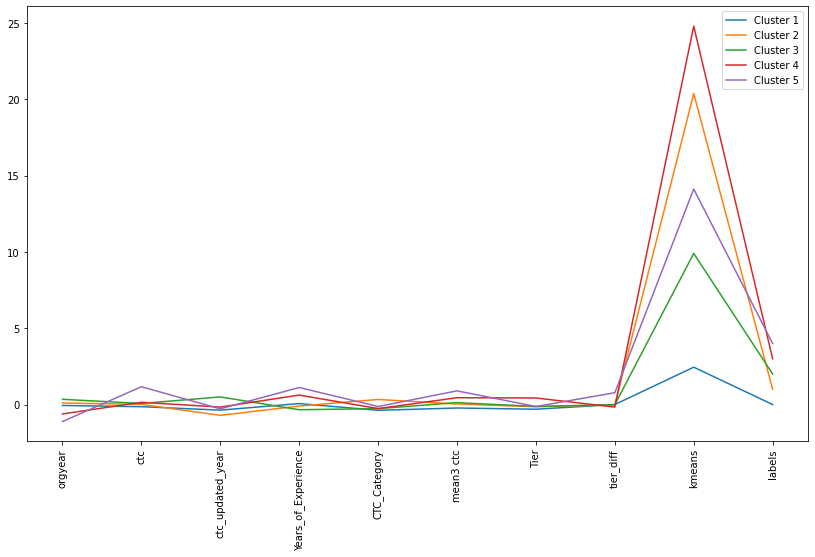

In [231]:
data_part['label'] = pd.Series(y_pred, index=data_part.index)

clustered_df = data_part.groupby('label').mean()

labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

plt.figure(figsize=(14,8))
plt.plot(clustered_df.T, label=labels)
plt.xticks(rotation=90)
plt.legend(labels)

### Insights

#### 1) Top Paying job titles are Engineering Leadership, SDET, Backend Engineer, Data Scientist, Product and FullStack Engineer.
#### 2) Most employees are Backend Engineer followed up by Front Engineer in the data.
#### 3) After 2019 less employees got their ctc updated mainly due to recession/covid. The average ctc is descreasing year by year.
#### 4) Engineering leadership and Android Engineer are top 2 positions in every company which has highest CTC.
#### 5) Optimal number of clusters are around 16-20 on scaled data. Thus we can group the employees in 16 different clusters.

### Recommendations

#### 1) Employees who want to start their career or switch their careers can target job positions like SDET, Backend Engineer, Data Scientist.
#### 2) Since incrementing ctc is decreasing year on year employees can try to switch their companies after 2-3 years.